# BL40A2010 Introduction to IoT-Based Systems

## Tutorial 3: *Network*

## Author: Pedro Nardelli

In [7]:
#install missing libraries
! pip install --upgrade networkx
! pip install --upgrade scipy

Requirement already up-to-date: networkx in /srv/conda/envs/notebook/lib/python3.7/site-packages (2.4)
Requirement already up-to-date: scipy in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.5.2)


In [8]:
#Import libraries -->> If an error happens (no library), you need to install the missing libraries (see above)
import networkx as nx #https://networkx.github.io/
import matplotlib.pyplot as plt #https://matplotlib.org/
import scipy as sp
import numpy as np

In [9]:
#checking versions
print(nx.__version__)

2.4


### Basic commands

We will use here the library [NetworkX](https://networkx.github.io/documentation/stable/tutorial.html).

In [57]:
#Creating a graph
G = nx.Graph()

In [58]:
#Adding nodes in different ways
#One node
G.add_node(1)
#Two or more nodes
G.add_nodes_from([2, 3])

In [59]:
#Creating edges
#One edge
G.add_edge(1, 2)
#From a variable
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
#Two or more edges
G.add_edges_from([(1, 2), (1, 3)])

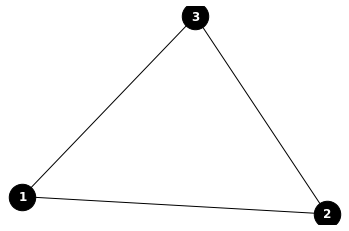

In [60]:
#Plot the graph
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

### Specific graph generator

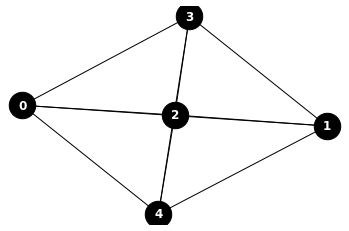

In [15]:
#Clear the graph
G.clear()
#Generating a complete graph with 5 elements
G = nx.complete_graph(5)
#G = nx.barabasi_albert_graph(100, 5)
#
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
#
plt.axis('off')
plt.show()

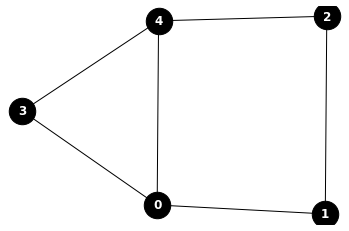

In [16]:
#Removing edges from  (1,3), (2,3), (1,4) and (0,2)
#Note that the graph labels nodes from 0 to 4.
G.remove_edge(1, 3)
G.remove_edge(2, 3)
G.remove_edge(1, 4)
G.remove_edge(0, 2)
#
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

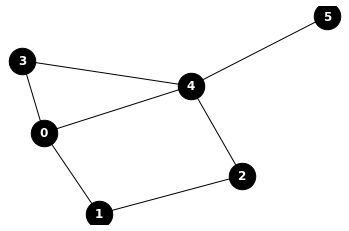

In [17]:
#Adding a new node number 5 to node 4
G.add_node(5)
G.add_edge(4, 5)
#
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

### Making some calculation with this graph

First thing to do is to compute the adjacent matrix:

$$
A = \begin{pmatrix} 
	0 & 1 & 0 & 1 & 1 & 0 \\
	1 & 0 & 1 & 0 & 0 & 0 \\
	0 & 1 & 0 & 0 & 1 & 0 \\
	1 & 0 & 0 & 0 & 1 & 0\\
	1 & 0 & 1 & 1 & 0 & 1 \\    
    0 & 0 & 0 & 0 & 1& 0 
\end{pmatrix}
$$

In [18]:
A=nx.adjacency_matrix(G)
#printing https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.lil_matrix.todense.html
print(A.todense())

[[0 1 0 1 1 0]
 [1 0 1 0 0 0]
 [0 1 0 0 1 0]
 [1 0 0 0 1 0]
 [1 0 1 1 0 1]
 [0 0 0 0 1 0]]


The degree of nodes: $k_0 = 3$, $k_1 = 2$, $k_2 = 2$, $k_3 = 2$, $k_4 = 4$, $k_5 = 1$

In [19]:
G.degree()

DegreeView({0: 3, 1: 2, 2: 2, 3: 2, 4: 4, 5: 1})

In [20]:
nx.clustering(G)

{0: 0.3333333333333333, 1: 0, 2: 0, 3: 1.0, 4: 0.16666666666666666, 5: 0}

In [21]:
nx.diameter(G)

3

### What happens if a connection between 3 and 5 is created?

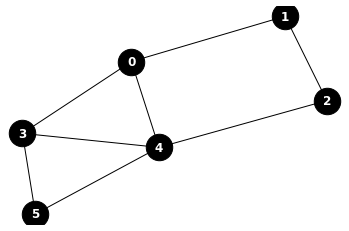

In [22]:
G.add_edge(3, 5)
#
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

In [23]:
G.degree()

DegreeView({0: 3, 1: 2, 2: 2, 3: 3, 4: 4, 5: 2})

In [24]:
nx.clustering(G)

{0: 0.3333333333333333,
 1: 0,
 2: 0,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 1.0}

In [25]:
nx.diameter(G)

3

### How to decrease the network diameter by including an edge?

In [26]:
for i in range(6): 
    print(i, nx.shortest_path_length(G,i))

0 {0: 0, 1: 1, 3: 1, 4: 1, 2: 2, 5: 2}
1 {1: 0, 0: 1, 2: 1, 3: 2, 4: 2, 5: 3}
2 {2: 0, 1: 1, 4: 1, 0: 2, 3: 2, 5: 2}
3 {3: 0, 0: 1, 4: 1, 5: 1, 1: 2, 2: 2}
4 {4: 0, 0: 1, 2: 1, 3: 1, 5: 1, 1: 2}
5 {5: 0, 4: 1, 3: 1, 0: 2, 2: 2, 1: 3}


We can see that the diameter of the network is given by the maximum value of the shortest path, in this case between 1 and 5. Now let us see what is this path.

In [27]:
nx.shortest_path(G,1,5)

[1, 0, 3, 5]

If we include an edge between then, we expect to decrease the network diameter. Let's see.

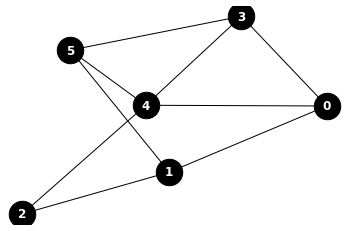

In [28]:
G.add_edge(1, 5)
#
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

In [29]:
nx.diameter(G)

2

### Analysis of a communication network topology

We would like to study the relation between *polarized* communication networks. We will create a net complete network with 6 elements.

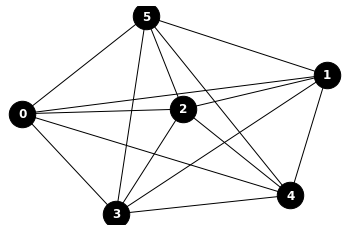

In [30]:
H=nx.complete_graph(6)
nx.draw_networkx(H, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

In [31]:
H.degree()

DegreeView({0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5})

In [32]:
nx.clustering(H)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}

In [33]:
nx.diameter(H)

1

Let us combine both graphs.

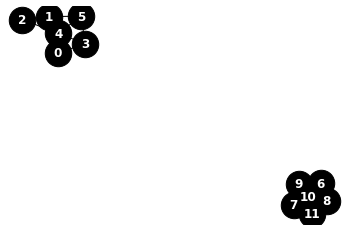

In [34]:
#Create a new graph
#U.clear()
U=nx.disjoint_union(G,H)
#Plotting to see how it looks like
nx.draw_networkx(U, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

In [35]:
nx.number_connected_components(U)

2

In [36]:
nx.node_connected_component(U, 0)

{0, 1, 2, 3, 4, 5}

In [37]:
nx.node_connected_component(U, 8)

{6, 7, 8, 9, 10, 11}

Now we can add a link between then, let me say between 0 and 6.

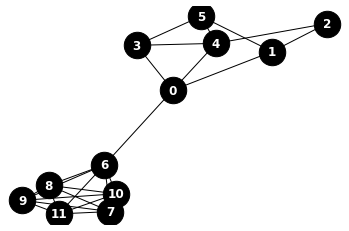

In [38]:
U.add_edge(0, 6)
#
nx.draw_networkx(U, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

In [39]:
nx.clustering(U)

{0: 0.16666666666666666,
 1: 0,
 2: 0,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.3333333333333333,
 6: 0.6666666666666666,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0}

In [40]:
nx.diameter(U)

4

In [41]:
nx.number_connected_components(U)

1

In [42]:
nx.node_connected_component(U, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

### Let's analyze how data propagate in this network